<a href="https://colab.research.google.com/github/Ugo-Ogbodo/Personal_learns/blob/main/DL_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!git clone https://github.com/udacity/deep-learning-v2-pytorch.git

Cloning into 'deep-learning-v2-pytorch'...
remote: Enumerating objects: 1719, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 1719 (delta 0), reused 3 (delta 0), pack-reused 1713
Receiving objects: 100% (1719/1719), 148.76 MiB | 28.07 MiB/s, done.
Resolving deltas: 100% (826/826), done.
Checking out files: 100% (271/271), done.


In [37]:
cd deep-learning-v2-pytorch/

/content/deep-learning-v2-pytorch/deep-learning-v2-pytorch/deep-learning-v2-pytorch/deep-learning-v2-pytorch


In [38]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5), (0.5)),
                                ])
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [40]:
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

#Building the Network Architecture

In [41]:
from torch import nn, optim
import torch.nn.functional as F

In [42]:
class Ugo(nn.Module):
  def __init__(self):
    super().__init__()

    self.hidden = nn.Linear(784, 256)
    self.hidden2 = nn.Linear(256, 128)
    self.hidden3 = nn.Linear(128, 64)
    self.output = nn.Linear(64, 10)

  def forward(self, x):
    x = x.view(x.shape[0], -1)
    
    x = F.relu(self.hidden(x))
    x = F.relu(self.hidden2(x))
    x = F.relu(self.hidden3(x))
    x = F.softmax(self.output(x), dim=1)

    return x

#Building the Network, Criterion and Optimizer

In [43]:
model = Ugo()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

#Trainning the Network

In [44]:
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        #images = images.view(images.shape[0], -1)
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: -0.6192380155819946
Training loss: -0.6788600880835356
Training loss: -0.6743061114539469
Training loss: -0.6621924943125832
Training loss: -0.6203425783338323


#Test the Network

In [45]:
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py

--2022-09-05 06:36:31--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2022-09-05 06:36:31 (46.8 MB/s) - ‘helper.py’ saved [2813/2813]



In [46]:
import importlib
importlib.reload(helper)

<module 'helper' from '/content/deep-learning-v2-pytorch/deep-learning-v2-pytorch/deep-learning-v2-pytorch/deep-learning-v2-pytorch/helper.py'>

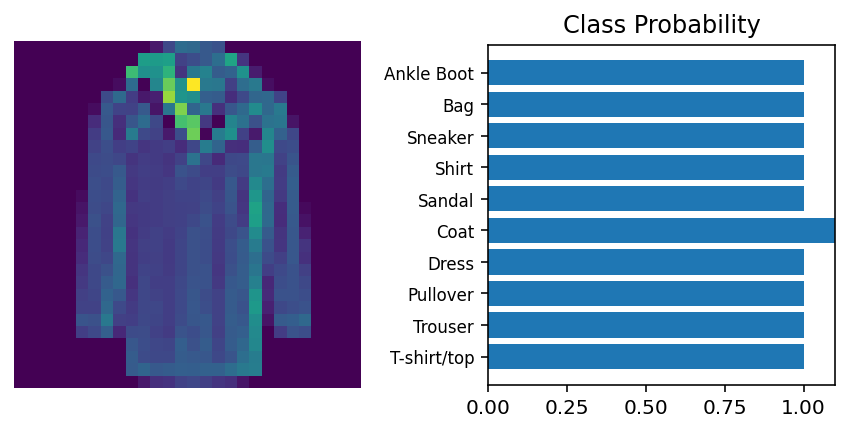

In [60]:
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

#to calc class of probabilities
ps = torch.exp(model(img))

helper.view_classify(img, ps, version='Fashion')